# Lista 05 - IC + Teste de Hipóteses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import binom

# Exercício 1

Utilize o dataset dados-covid-mg para explorar a seguinte hipótese:

Hipótese: Em MG cerca de 50% da população já foi detectada com COVID.

Dataset obtido no openDataSUS, um recorte do estado de MG. Para facilitar, algumas colunas foram removidas e o atributo classificacaoFinal foi binarizado.

In [2]:
df = pd.read_csv('dados-covid-mg.csv')
df.head()

,id,profissionalSaude,tipoTeste,resultadoTeste,estado,municipio,classificacaoFinal
0,R3y2Di9K0s,Não,RT-PCR,Negativo,MINAS GERAIS,Varginha,0
1,4awz0HPaCl,Sim,RT-PCR,Negativo,MINAS GERAIS,Carmópolis de Minas,0
2,0RjrlH0bs5,Não,NaN,NaN,MINAS GERAIS,Conselheiro Lafaiete,0
3,83B4gJDLpU,Não,NaN,NaN,MINAS GERAIS,Mariana,0
4,H8GKXacI4T,Não,NaN,NaN,MINAS GERAIS,Januária,0


A) Calcule a prevalência de infectados na amostra, armazene na variável p.

In [3]:
# YOUR CODE HERE
classif = np.array(df["classificacaoFinal"])
p = (classif == 1).sum()/len(classif)

In [4]:
#Resposta
p

0.409622523888832

B) Calcule a variância (utilizando p), armazene em var.

In [5]:
# YOUR CODE HERE
var = p*(1-p)

In [6]:
#Resposta
var

0.24183191181177527

C) Calcule o intervalo de confiança dessa estimativa, considerando 95% de chance. O resultado deve ser uma tupla a,b armazenada em ic.

In [7]:
# YOUR CODE HERE
media = p
desvio_padrao = math.sqrt(var)
raiz_n = math.sqrt(len(classif))

inferior = media - 1.96*(desvio_padrao/raiz_n)
superior = media + 1.96*(desvio_padrao/raiz_n)

ic = (inferior, superior)

In [8]:
#Resposta
ic

(0.40754359272076335, 0.4117014550569007)

D) Quais as afirmações analíticas podem ser feitas com base nessa exploração? Se julgar necessário plote gráficos que corroborem a análise.

Com base no intervalo de confiança (ic = (0.40754359272076335, 0.4117014550569007)) e no valor encontrado para a prevalência 
de infectados na amostra (p = 0.409622523888832) podemos, analiticamente, dizer que a hipótese não parece ser factível, já que 0.5 não está no intervalo de confiança e p = 0.409622523888832. Logo, dizer que em MG cerca de 50% da população já foi detectada com COVID não parece correto.

# Exercício 2

Hipótese Nula: A prevalência de COVID para profissionais de saúde é igual a de não profissionais de saúde.

Utilize o teste de permutação para randomizando os dados, aproximar o p-valor e validar se a hipótese é aceita.

In [9]:
#Convertendo as series para numpy
profissionais = df['profissionalSaude'].to_numpy()
classificacaoFinal = df['classificacaoFinal'].to_numpy()

A) Calcule t_obs, armazene em t_obs.

In [10]:
# YOUR CODE HERE

prof_saude = df.loc[df['profissionalSaude'] == 'Sim'] #Profissionais de saúde
prof_nao_saude = df.loc[df['profissionalSaude'] == 'Não'] #Profissionais que não são de saúde

num_saude = len(np.array(prof_saude['classificacaoFinal'])) #Número de profissionais de saúde
num_nao_saude = len(np.array(prof_nao_saude['classificacaoFinal'])) #Número de profissionais que não são de saúde

df2 = df.loc[df['classificacaoFinal'] == 1] #Pessoas com Covid
df3 = df2[['profissionalSaude', 'classificacaoFinal']] #Filtrando colunas de interesse das pessoas com Covid

df4 = df3.groupby(by=['profissionalSaude']).sum() #Agrupa, por tipo de profissional, o número total de infectados

#Diferênça entre a prevalência de infectados que não são da saúde e infectados profissionais da saúde
t_obs = (df4['classificacaoFinal'][0])/num_nao_saude - (df4['classificacaoFinal'][1])/num_saude

t_obs

0.12913123185305075

In [11]:
#Resposta
t_obs

0.12913123185305075

B) Implemente o teste de permutação para os dados

Relembrando: Shuffle, computar diferença média, fazer isso n vezes.

Para sua análise utilize o valor de N que considerar adequado, no entanto na entrega fixe N em 1000. Armazene a lista de diferenças em diferencas.

In [12]:
# YOUR CODE HERE
N=1000

valores = classificacaoFinal

diferencas = np.zeros(N) 

for i in range(N):
    grupos = profissionais
    np.random.shuffle(grupos)
    
    dic = {'profissionalSaude':grupos, 'numPrevalencia':valores}
    data = pd.DataFrame(dic)
    
    data2 = data[(data['profissionalSaude'] == 'Sim') | (data['profissionalSaude'] == 'Não')]
    
    dif = data2.groupby(by=['profissionalSaude']).sum()
    
    diferencas[i] = (dif['numPrevalencia'][0])/num_nao_saude - (dif['numPrevalencia'][1])/num_saude

C) Plote o histograma e avalie qual a chance de um t_obs maior que os dados.

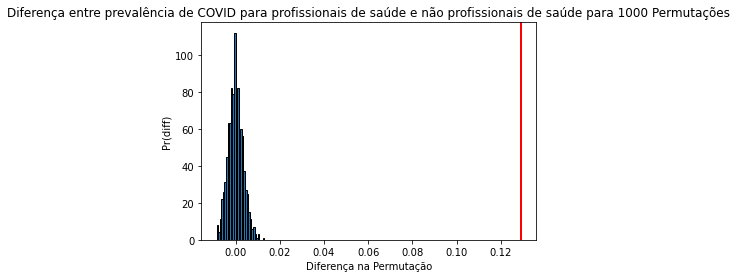

In [13]:
# YOUR CODE HERE
plt.hist(diferencas, bins=30, edgecolor='k')
plt.title("Diferença entre prevalência de COVID para profissionais de saúde e não profissionais de saúde para 1000 Permutações")
plt.xlabel("Diferença na Permutação")
plt.ylabel("Pr(diff)")
#plt.ylim(0, 1)
plt.axvline(x=t_obs, color='r', linestyle='solid', linewidth=2)
plt.show()

D) A hipótese nula é aceita ou rejeitada? Explique

A hipótese nula é rejeitada, uma vez que o valor observado t_obs = 0.12913123185305075 (linha em vermelho) está muito distante (extremo) do intervalo esperado na hipótese nula. Isto é, o valor-p (probabilidade de encontrar aleatóriamente no mundo nulo um valor mais extremo do que o valor observado) é muito pequeno, fazendo com que a hipótese nula seja pouco factível.